# Heart Atttack Prediction

The purpose of this project is to create a model to predict whether a patient is diagnosed with a heart attack or not based on their medical records. This model will be built from the existing dataset using logistic regression. If the accuracy is too low, then it will be rebuilt using deep learning methods.

In [25]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('heart_attack_south_africa.csv',  index_col = 0)

In [29]:
df.head()

,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
Patient_ID,,,,,,,,,,,,,,,,,,,
1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0


In [31]:
#checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           100000 non-null  int64  
 1   Gender                        100000 non-null  object 
 2   Cholesterol_Level             100000 non-null  int64  
 3   Blood_Pressure_Systolic       100000 non-null  int64  
 4   Blood_Pressure_Diastolic      100000 non-null  int64  
 5   Smoking_Status                100000 non-null  object 
 6   Alcohol_Intake                100000 non-null  object 
 7   Physical_Activity             100000 non-null  object 
 8   Obesity_Index                 100000 non-null  float64
 9   Diabetes_Status               100000 non-null  object 
 10  Family_History_Heart_Disease  100000 non-null  object 
 11  Diet_Quality                  100000 non-null  object 
 12  Stress_Level                  100000 non-null  ob

In [33]:
dup = df.duplicated()
dup.value_counts()

False    100000
Name: count, dtype: int64

There are no abnormalities in the dataset, there are no null values and duplicate rows, it can be said that the data is clean.

# Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

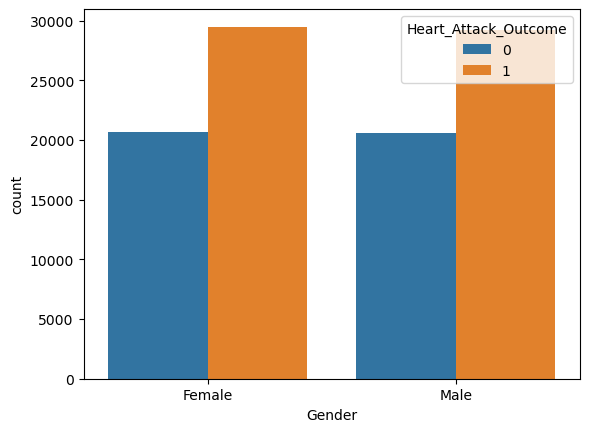

In [35]:
sns.countplot(df, x = 'Gender', hue = 'Heart_Attack_Outcome')

<Axes: xlabel='Cholesterol_Level', ylabel='Count'>

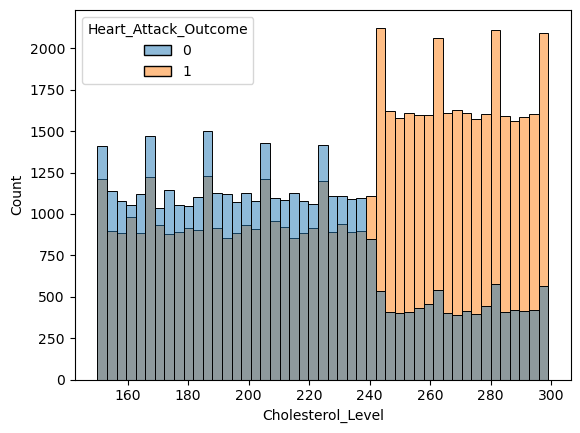

In [37]:
sns.histplot(df, x = 'Cholesterol_Level', hue = 'Heart_Attack_Outcome')

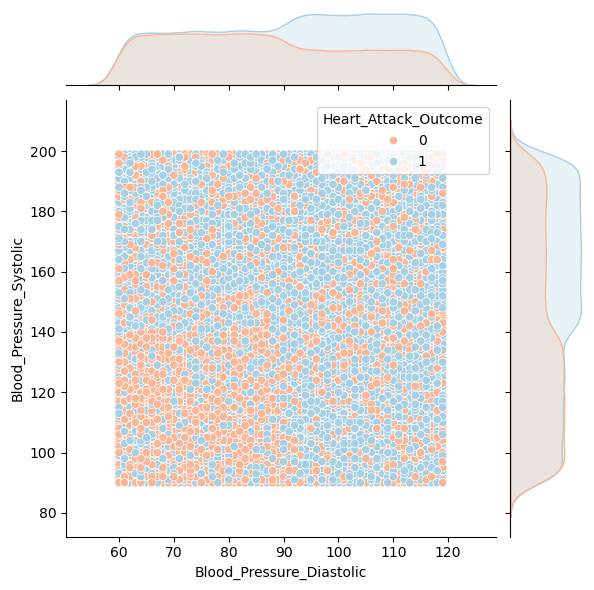

In [13]:
sns.jointplot(df, x = 'Blood_Pressure_Diastolic', y = 'Blood_Pressure_Systolic',  hue = 'Heart_Attack_Outcome', palette = 'RdBu')

<Axes: xlabel='Obesity_Index', ylabel='Count'>

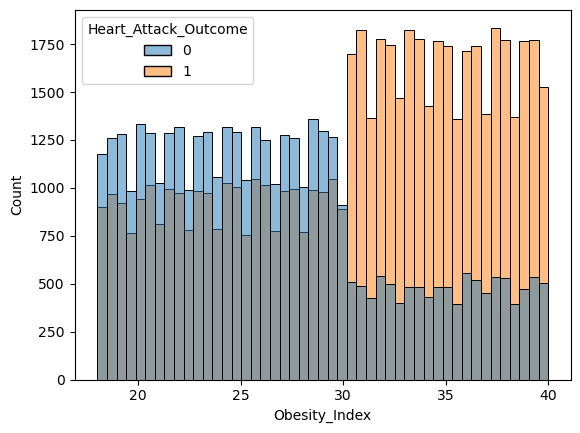

In [23]:
sns.histplot(data = df,x= 'Obesity_Index',hue = 'Heart_Attack_Outcome')

Some data is of object data type, cannot be used to create a model. Let's change the column of object type to int.

In [39]:
df['Gender'] = df['Gender'].replace('Female', int(0))
df['Gender'] = df['Gender'].replace('Male', int(1))

C:\Users\novit\AppData\Local\Temp\ipykernel_3884\3425373255.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace('Male', int(1))


In [41]:
df['Smoking_Status'].value_counts()

Smoking_Status
No     69989
Yes    30011
Name: count, dtype: int64

In [43]:
df['Smoking_Status'] = df['Smoking_Status'].replace('No', int(0))
df['Smoking_Status'] = df['Smoking_Status'].replace('Yes', int(1))

C:\Users\novit\AppData\Local\Temp\ipykernel_3884\316772291.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Smoking_Status'] = df['Smoking_Status'].replace('Yes', int(1))


In [45]:
df['Alcohol_Intake'].value_counts()

Alcohol_Intake
Moderate    40262
Low         39772
High        19966
Name: count, dtype: int64

In [47]:
df['Alcohol_Intake'] = df['Alcohol_Intake'].replace('Low', int(0))
df['Alcohol_Intake'] = df['Alcohol_Intake'].replace('Moderate', int(1))
df['Alcohol_Intake'] = df['Alcohol_Intake'].replace('High', int(2))

C:\Users\novit\AppData\Local\Temp\ipykernel_3884\2519466088.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Alcohol_Intake'] = df['Alcohol_Intake'].replace('High', int(2))


In [49]:
df['Physical_Activity'].value_counts()

Physical_Activity
Sedentary        50275
Active           29810
Highly Active    19915
Name: count, dtype: int64

In [51]:
df['Physical_Activity'] = df['Physical_Activity'].replace('Sedentary', int(0))
df['Physical_Activity'] = df['Physical_Activity'].replace('Active', int(1))
df['Physical_Activity'] = df['Physical_Activity'].replace('Highly Active', int(2))

C:\Users\novit\AppData\Local\Temp\ipykernel_3884\3632774527.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Physical_Activity'] = df['Physical_Activity'].replace('Highly Active', int(2))


In [53]:
df['Diabetes_Status'].value_counts()

Diabetes_Status
No     80155
Yes    19845
Name: count, dtype: int64

In [55]:
df['Diabetes_Status'] = df['Diabetes_Status'].replace('No', int(0))
df['Diabetes_Status'] = df['Diabetes_Status'].replace('Yes', int(1))

C:\Users\novit\AppData\Local\Temp\ipykernel_3884\214899147.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diabetes_Status'] = df['Diabetes_Status'].replace('Yes', int(1))


In [57]:
df['Family_History_Heart_Disease'].value_counts()

Family_History_Heart_Disease
No     74977
Yes    25023
Name: count, dtype: int64

In [59]:
df['Family_History_Heart_Disease'] = df['Family_History_Heart_Disease'].replace('No', int(0))
df['Family_History_Heart_Disease'] = df['Family_History_Heart_Disease'].replace('Yes', int(1))

C:\Users\novit\AppData\Local\Temp\ipykernel_3884\3629938683.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family_History_Heart_Disease'] = df['Family_History_Heart_Disease'].replace('Yes', int(1))


In [87]:
df['Diet_Quality'].value_counts()

Diet_Quality
Average    49818
Poor       30088
Good       20094
Name: count, dtype: int64

In [61]:
df['Diet_Quality'] = df['Diet_Quality'].replace('Poor', int(0))
df['Diet_Quality'] = df['Diet_Quality'].replace('Average', int(1))
df['Diet_Quality'] = df['Diet_Quality'].replace('Good', int(2))

C:\Users\novit\AppData\Local\Temp\ipykernel_3884\2991120519.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diet_Quality'] = df['Diet_Quality'].replace('Good', int(2))


In [63]:
df['Stress_Level'].value_counts()

Stress_Level
Medium    50156
Low       29983
High      19861
Name: count, dtype: int64

In [65]:
df['Stress_Level'] = df['Stress_Level'].replace('Low', int(0))
df['Stress_Level'] = df['Stress_Level'].replace('Medium', int(1))
df['Stress_Level'] = df['Stress_Level'].replace('High', int(2))

C:\Users\novit\AppData\Local\Temp\ipykernel_3884\1292254357.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stress_Level'] = df['Stress_Level'].replace('High', int(2))


In [67]:
df['Heart_Attack_History'].value_counts()

Heart_Attack_History
No     85023
Yes    14977
Name: count, dtype: int64

In [69]:
df['Heart_Attack_History'] = df['Heart_Attack_History'].replace('No', int(0))
df['Heart_Attack_History'] = df['Heart_Attack_History'].replace('Yes', int(1))

C:\Users\novit\AppData\Local\Temp\ipykernel_3884\2068073928.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Heart_Attack_History'] = df['Heart_Attack_History'].replace('Yes', int(1))


In [71]:
df['Medication_Usage'].value_counts()

Medication_Usage
Yes    50079
No     49921
Name: count, dtype: int64

In [73]:
df['Medication_Usage'] = df['Medication_Usage'].replace('No', int(0))
df['Medication_Usage'] = df['Medication_Usage'].replace('Yes', int(1))

C:\Users\novit\AppData\Local\Temp\ipykernel_3884\1335365848.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Medication_Usage'] = df['Medication_Usage'].replace('Yes', int(1))


In [75]:
df.head()

,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
Patient_ID,,,,,,,,,,,,,,,,,,,
1,76,0,156,94,79,0,2,0,35.2,0,0,2,2,0,0,264,141,65,0
2,39,0,160,185,88,0,0,0,21.3,0,0,1,1,0,1,150,81,42,0
3,85,1,254,173,113,1,1,2,32.0,1,0,2,0,0,0,220,124,70,1
4,45,0,261,187,65,0,2,0,36.4,0,1,1,0,0,1,141,56,38,1
5,48,1,206,189,84,0,0,1,26.6,0,0,2,2,0,0,221,186,26,0


<Axes: >

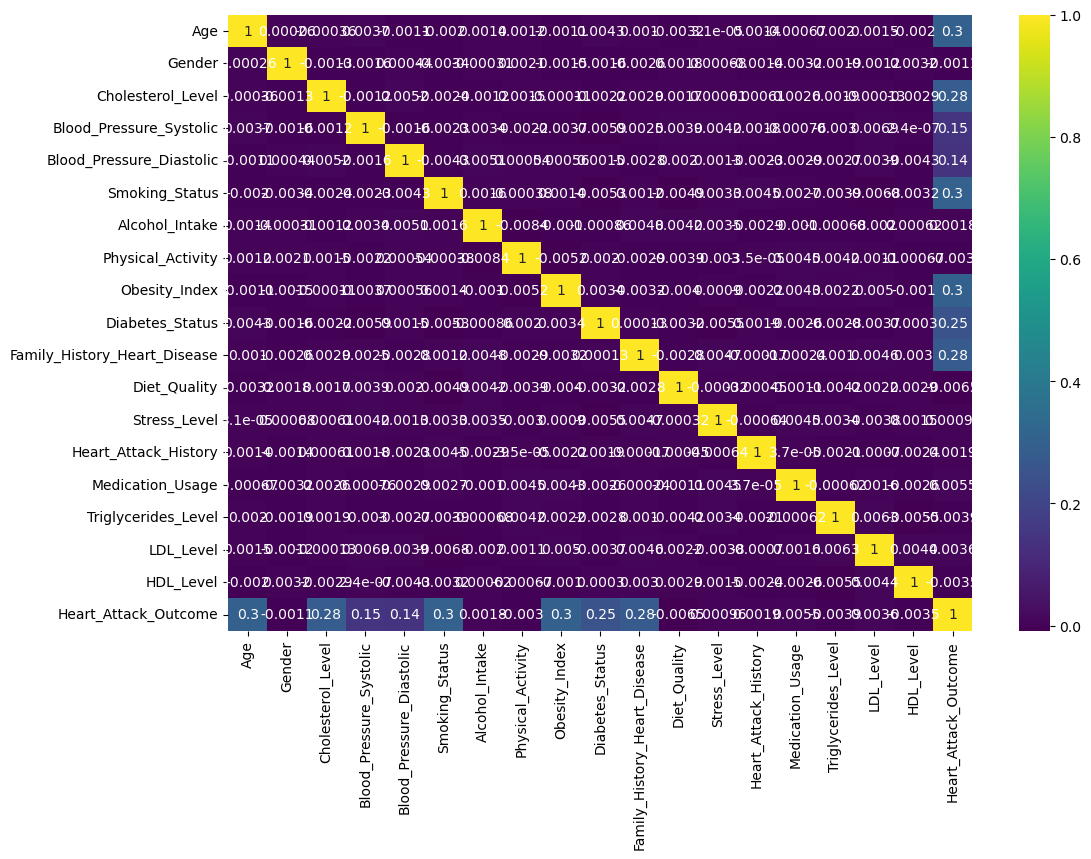

In [165]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(numeric_only=True), annot= True, cmap = 'viridis')

In [77]:
df.corr()['Heart_Attack_Outcome'].sort_values()

Diet_Quality                   -0.006526
Triglycerides_Level            -0.003899
HDL_Level                      -0.003492
Physical_Activity              -0.002991
Gender                         -0.001068
Stress_Level                    0.000955
Alcohol_Intake                  0.001807
Heart_Attack_History            0.001919
LDL_Level                       0.003568
Medication_Usage                0.005468
Blood_Pressure_Diastolic        0.140187
Blood_Pressure_Systolic         0.148573
Diabetes_Status                 0.250756
Family_History_Heart_Disease    0.278858
Cholesterol_Level               0.283860
Obesity_Index                   0.296385
Age                             0.298683
Smoking_Status                  0.299025
Heart_Attack_Outcome            1.000000
Name: Heart_Attack_Outcome, dtype: float64

# Creating a Model Using Logistic Regression

In [79]:
from sklearn.model_selection import train_test_split

In [81]:
X = df.drop('Heart_Attack_Outcome', axis= 1)
y = df['Heart_Attack_Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [83]:
from sklearn.linear_model import LogisticRegression

In [85]:
logmodel = LogisticRegression()

In [87]:
logmodel.fit(X_train,y_train)

C:\Users\novit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
pred = logmodel.predict(X_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 8715  3784]
 [ 2659 14842]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73     12499
           1       0.80      0.85      0.82     17501

    accuracy                           0.79     30000
   macro avg       0.78      0.77      0.78     30000
weighted avg       0.78      0.79      0.78     30000



The accuracy is actually not too low, still above 0.50, but can we improve the accuracy to at least 0.85? Let's try using deep learning method.

# Deep Learning Methode

In [95]:
X = df.drop('Heart_Attack_Outcome', axis= 1).values
y = df['Heart_Attack_Outcome'].values

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler = MinMaxScaler()

In [103]:
X_train = scaler.fit_transform(X_train)

In [105]:
X_test = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [ ]:
model = Sequential()

model.add(Dense(18, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam' )

In [ ]:
model.fit(x=X_train, y=y_train, epochs=25,batch_size= 256, validation_data=(X_test,y_test))

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('heart_attack_log.keras')

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [215]:
predictions =  (model.predict(X_test) > 0.5).astype("int32")

938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [217]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[10799  1700]
 [ 1250 16251]]
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     12499
           1       0.91      0.93      0.92     17501

    accuracy                           0.90     30000
   macro avg       0.90      0.90      0.90     30000
weighted avg       0.90      0.90      0.90     30000



Unexpectedly, we got a model with very high accuracy.